## 대한민국 (South Korea) 관련 데이터 분석

In [14]:
import pandas as pd

df_2022 = pd.read_csv("datasets/2022.csv", sep=",")
df_2022.columns = df_2022.columns.str.lower()

df_2021 = pd.read_csv("datasets/2021.csv", sep=",")
df_2021.columns = df_2021.columns.str.lower()

df_2020 = pd.read_csv("datasets/2020.csv", sep=",")
df_2020.columns = df_2020.columns.str.lower()

df_2019 = pd.read_csv("datasets/2019.csv", sep=",")
df_2019.columns = df_2019.columns.str.lower()

df_2018 = pd.read_csv("datasets/2018.csv", sep=",")
df_2018.columns = df_2018.columns.str.lower()

df_2017 = pd.read_csv("datasets/2017.csv", sep=",")
df_2017.columns = df_2017.columns.str.lower()

df_2016 = pd.read_csv("datasets/2016.csv", sep=",")
df_2016.columns = df_2016.columns.str.lower()

df_2015 = pd.read_csv("datasets/2015.csv", sep=",")
df_2015.columns = df_2015.columns.str.lower()

---

- Country: South Korea  
- Features: Score, Economy, Health, Freedom

In [61]:
from sklearn.preprocessing import MinMaxScaler

def find_column(df, to_contain):
    mask = df.columns.str.contains(to_contain)
    col_name = df.columns[mask].values[0]
    return col_name

def format_float(values):
    try:
        values = np.array(values).astype(np.float_)
    except ValueError:
        for i, elem in enumerate(values):
            values[i] = str(elem).replace(",", ".")
        values = np.array(values).astype(np.float_)
    return values

def stanardlize_df(df):
    scaler = MinMaxScaler()
    scaler.fit(df)
    arr = scaler.transform(df)
    df = pd.DataFrame(arr)
    return df

def get_kor_values(df):
    country = find_column(df, "country")
    mask_country = df[country] == "South Korea"
    score = find_column(df, "score")
    gdp = find_column(df, "gdp")
    health = find_column(df, "health")
    freedom = find_column(df, "freedom")
    df = df.loc[:, [score, gdp, health, freedom]]
    try:
        df = stanardlize_df(df)
    except ValueError:
        array = list()
        for col in [score, gdp, health, freedom]:
            formatted = format_float(df.loc[:, col])
            array.append(formatted)
        scaler = MinMaxScaler()
        scaler.fit(df)
        arr = scaler.transform(df)
        df = pd.DataFrame(arr)
    df_kor = df[mask_country]
    values = df_kor.values.flatten().tolist()
    return values

In [62]:
kor_2022 = get_kor_values(df_2022)
kor_2021 = get_kor_values(df_2021)
kor_2020 = get_kor_values(df_2020)
kor_2019 = get_kor_values(df_2019)
kor_2018 = get_kor_values(df_2018)
kor_2017 = get_kor_values(df_2017)
kor_2016 = get_kor_values(df_2016)
kor_2015 = get_kor_values(df_2015)

In [63]:
import numpy as np

values = [kor_2015, kor_2016, kor_2017, kor_2018, kor_2019, kor_2020, kor_2021, kor_2022]
index_names = np.arange(2015, 2023).astype(np.str_)

df_kor = pd.DataFrame(values, index=index_names)
df_kor.columns = ["Score", "Economy", "Health", "Freedom"]
df_kor

,Score,Economy,Health,Freedom
2015,0.662384,0.736273,0.941604,0.495842
2016,0.634062,0.745219,0.930392,0.413621
2017,0.649257,0.749254,0.948100,0.391830
2018,0.628305,0.604008,0.927184,0.337017
2019,0.618796,0.772565,0.907975,0.251981
2020,0.630604,0.810386,0.898690,0.374106
2021,0.624553,0.801277,0.892783,0.493197
2022,0.651837,0.837936,0.892781,0.559459


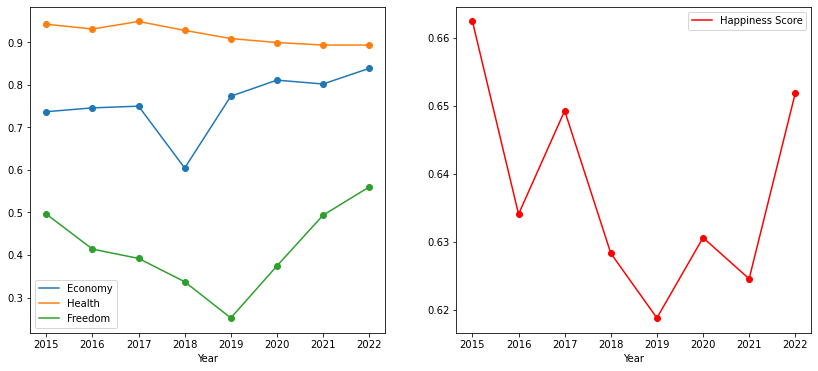

In [64]:
import matplotlib.pyplot as plt

years = df_kor.index
cols = df_kor.columns

plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.2)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

for col in cols[1:]:
    value = df_kor[col].values.flatten().tolist()
    ax1.scatter(years, value)
    ax1.plot(years, value, label=col)
ax1.set_xlabel("Year")
ax1.legend()

scores = df_kor["Score"].values.flatten().tolist()
ax2.scatter(years, scores, color="r")
ax2.plot(years, scores, label="Happiness Score", color="r")
ax2.set_xlabel("Year")
ax2.legend()

plt.show()